In [2]:
import pandas as pd
import os
import numpy as np


In [3]:
os.chdir('C:\\RESEARCH\\LUSC\\Stage')

In [4]:
X=pd.read_excel('Flux_Clinical_Stage.xlsx',index_col=0)

In [5]:
X.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,Tissue Source Site_NC,Tissue Source Site_NK,Tissue Source Site_O2,Tissue Source Site_XC,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months),Neoplasm Disease Stage American Joint Committee on Cancer Code3
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,10.518463,146.49113,-505.307115,-5.696311,285.777813,124.268717,268.647858,29.491254,95.057046,-145.068167,...,0,0,0,0,1,0,0,1,12.19,Stage IA
TCGA-18-3407-01,9.551598,143.67818,-434.700304,-3.660883,236.434371,128.267910,204.021467,44.445592,76.854620,-93.193927,...,0,0,0,0,1,0,0,1,4.47,Stage IB


In [6]:
X.shape

(501, 2374)

In [7]:
x=X.iloc[:,0:2372].values
y=X.iloc[:,-1].values

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [11]:
# Fitting Gradient Boosting  Classification to the Validation set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier = classifier.fit(X_train, y_train)
classifier.score(X_val, y_val)

0.8625

In [12]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [15]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8]) / cm.sum())
accuracy

0.8625

Confusion Matrix, without normalization
[[ 0  0  1  0  0  0  0  0  0]
 [ 1 11  0  0  0  0  0  0  0]
 [ 0  1 22  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0]
 [ 0  0  0  1 15  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  9  2  0]
 [ 0  0  1  1  0  0  0  1  0]
 [ 0  0  1  1  0  0  0  0  0]]


<Figure size 720x504 with 0 Axes>

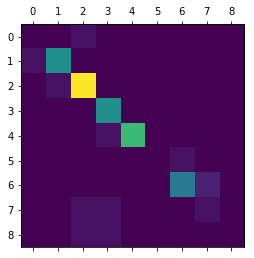

In [16]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.08333333 0.91666667 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.04347826 0.95652174 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.0625     0.9375     0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.81818182 0.18181818 0.        ]
 [0.         0.         0.33333333 0.33333333 0.         0.
  0.         0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.         0.        ]]


<Figure size 432x288 with 0 Axes>

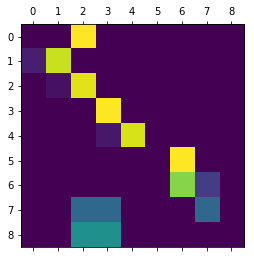

In [17]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [18]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.92      0.92        12
           2       0.88      0.96      0.92        23
           4       0.79      1.00      0.88        11
           5       1.00      0.94      0.97        16
           6       0.00      0.00      0.00         1
           7       0.90      0.82      0.86        11
           8       0.33      0.33      0.33         3
           9       0.00      0.00      0.00         2

   micro avg       0.86      0.86      0.86        80
   macro avg       0.54      0.55      0.54        80
weighted avg       0.83      0.86      0.85        80



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.83134804923186

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [ ]:

"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Gradient Boosting  Classification to the Validation set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier = classifier.fit(X_train, y_train)
classifier.score(X_val, y_val)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
